In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
pd.get_option("display.max_rows", None)
pd.set_option('display.max_columns', None)
nfl_data = pd.read_csv("NFL Play by Play 2009-2017 (v4).csv")
toDelete = ['ExPointResult','TwoPointConv','DefTwoPoint','Safety','Onsidekick','Passer','Passer_ID','QBHit','PassLocation','Interceptor','Rusher','Rusher_ID'
,'RunLocation','RunGap','Receiver','Receiver_ID','ReturnResult','Returner','BlockingPlayer','Tackler1','Tackler2','Challenge.Replay','ChalReplayResult'
,'Accepted.Penalty','PenalizedTeam','PenaltyType','PenalizedPlayer','Penalty.Yards','HomeTeam','AwayTeam','Timeout_Indicator','Timeout_Team','posteam_timeouts_pre'
,'HomeTimeouts_Remaining_Pre','AwayTimeouts_Remaining_Pre','HomeTimeouts_Remaining_Post','AwayTimeouts_Remaining_Post','No_Score_Prob','Opp_Field_Goal_Prob'
,'Opp_Safety_Prob','Opp_Touchdown_Prob','Field_Goal_Prob','Safety_Prob','Touchdown_Prob','ExPoint_Prob','TwoPoint_Prob','ExpPts','EPA','airEPA','yacEPA'
,'Home_WP_pre','Away_WP_pre','Home_WP_post','Away_WP_post','Win_Prob','WPA','airWPA','yacWPA','SideofField','sp','PuntResult','RecFumbTeam','RecFumbPlayer'
,'AbsScoreDiff','FieldGoalDistance','TimeUnder','posteam','DefensiveTeam','PlayAttempted','FieldGoalResult','Sack','RushAttempt','PassAttempt','ScoreDiff'
, 'desc', 'Date', 'GameID', 'Season', 'PassOutcome', 'PassLength', 'AirYards', 'YardsAfterCatch', 'yrdln', 'time',]

for x in toDelete:
    del nfl_data[x]



D:\Users\j05h1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
df = nfl_data.dropna()

In [4]:
def categorical_to_numeric(x):
    if x == 'No Play':
        return 0
    elif x == 'Run':
        return 1
    elif x == 'Pass':
        return 2
    elif x == 'Timeout':
        return 3
    elif x == 'Punt':
        return 4
    elif x == 'Field Goal':
        return 5
    elif x == 'Sack':
        return 6
    elif x == 'QB Kneel':
        return 7
    elif x == 'Spike':
        return 8

In [24]:
features = ['Drive', 'qtr', 'down', 'TimeSecs', 'PlayTimeDiff', 'yrdline100', 'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'Yards.Gained', 'PosTeamScore', 'DefTeamScore']
df['Label'] = df['PlayType'].apply(categorical_to_numeric)
df = df.dropna()
X = df[features]
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.075, random_state=2)

D:\Users\j05h1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
#creating the decision tree
my_DecisionTree = DecisionTreeClassifier(random_state=1)
#training the decision tree
my_DecisionTree.fit(X_train, y_train)
#predict y using decision tree
y_predict_dt = my_DecisionTree.predict(X_test)
#obtain score for decision tree
dt_score = accuracy_score(y_test, y_predict_dt)
print ("Decision Tree Accuracy: " + str(dt_score))

Decision Tree Accuracy: 0.6856747085305321


In [26]:
#the random forest classifier
my_RandomForest = RandomForestClassifier(n_estimators = 64, bootstrap = True, random_state=3)
#Training and Predicting using Random Forest
my_RandomForest.fit(X_train, y_train)
y_predict_rf = my_RandomForest.predict(X_test)

#calculating accuracy score of random forest
rf_score = accuracy_score(y_test, y_predict_rf)

#print random forest score
print("Random Forest Score: " + str(rf_score))

Random Forest Score: 0.7752125899418985


In [27]:
#predict using logistic regression

#create the Logistic Regression Classifier
lr = LogisticRegression()

lr.fit(X_train, y_train)

#predict y with logistic regression
y_predict_lr = lr.predict(X_test)

#get the logistic regression's score
lr_score = accuracy_score(y_test, y_predict_lr)

print("Logistic Regression Accuracy: " + str(lr_score))

Logistic Regression Accuracy: 0.6310362076263034


In [9]:
print ("Decision Tree Accuracy: " + str(dt_score))
print("Random Forest Accuracy: " + str(rf_score))
print("Logistic Regression Accuracy: " + str(lr_score))

Decision Tree Accuracy: 0.6856747085305321
Random Forest Accuracy: 0.7752125899418985
Logistic Regression Accuracy: 0.6310362076263034


In [37]:
y_predict_prob_dt = my_DecisionTree.predict_proba(X_test)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_predict_prob_dt[:,1], pos_label=1)
AUC_dt = auc(fpr_dt, tpr_dt)

y_predict_prob_rf = my_RandomForest.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_predict_prob_rf[:,1], pos_label=1)
AUC_rf = auc(fpr_rf, tpr_rf)

y_predict_prob_lr = lr.predict_proba(X_test)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)
AUC_lr = auc(fpr_lr, tpr_lr)

print(AUC_dt)
print(AUC_rf)
print(AUC_lr)

0.7141136992005079
0.8807637116838195
0.7558641837835205


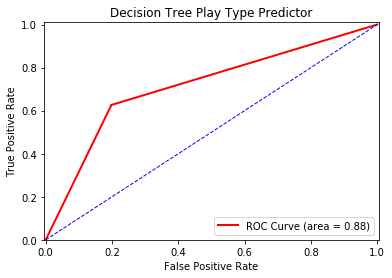

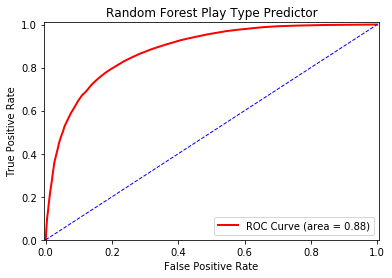

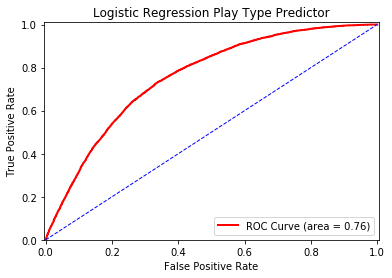

In [39]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_rf)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Play Type Predictor')
plt.legend(loc="lower right")

plt.show()

# Roc Curve:
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_rf)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Play Type Predictor')
plt.legend(loc="lower right")

plt.show()

# Roc Curve:
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_lr)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Play Type Predictor')
plt.legend(loc="lower right")

plt.show()